# Introduction

In [14]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data
species = pd.read_csv('species_info.csv')
observations = pd.read_csv('observations.csv')

In [3]:
# Take a preliminary look at data
species.head(10)

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
5,Mammal,Odocoileus virginianus,White-Tailed Deer,NaN
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",NaN
7,Mammal,Canis latrans,Coyote,Species of Concern
8,Mammal,Canis lupus,Gray Wolf,Endangered
9,Mammal,Canis rufus,Red Wolf,Endangered


In [4]:
observations.head(10)

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85
5,Elymus virginicus var. virginicus,Yosemite National Park,112
6,Spizella pusilla,Yellowstone National Park,228
7,Elymus multisetus,Great Smoky Mountains National Park,39
8,Lysimachia quadrifolia,Yosemite National Park,168
9,Diphyscium cumberlandianum,Yellowstone National Park,250


We see that there are some NaNs in the conservation status. We don't know what the conservation status is for those plants/animals. For now, we can leave the NaNs there and not drop any data. For the observations data set, at first glance there doesn't appear to have any NaNs. We can investigate both these data sets further.

In [7]:
print(species.isnull().sum())
len(species)

category                  0
scientific_name           0
common_names              0
conservation_status    5633
dtype: int64


5824

In [12]:
print(observations.isnull().sum())
len(observations)

scientific_name    0
park_name          0
observations       0
dtype: int64


23296

There are 5633 missing values in the conservation_status column of the species dataset. That's almost the length of the entire species dataset. It would be wise to not drop the NaN values since that would remove the majority of the data. It also appears that the length of the observations dataset is 23296. We can continue investigating.

In [11]:
species.conservation_status.unique()

array([nan, 'Species of Concern', 'Endangered', 'Threatened',
       'In Recovery'], dtype=object)

In [13]:
observations.park_name.unique()

array(['Great Smoky Mountains National Park', 'Yosemite National Park',
       'Bryce National Park', 'Yellowstone National Park'], dtype=object)

We can take this information and gather some more insights. We can first question which conservation status is the most common and which is the least common.

In [26]:
species.conservation_status.value_counts(dropna=False)

NaN                   5633
Species of Concern     161
Endangered              16
Threatened              10
In Recovery              4
Name: conservation_status, dtype: int64

Excluding NaNs, Species of Concern is the most common conservation status and In Recovery is the least common. We can also visualize this in a graph.

<AxesSubplot:xlabel='conservation_status', ylabel='count'>

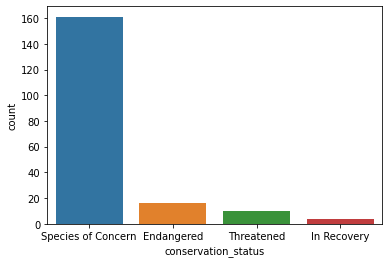

In [27]:
sns.countplot(x='conservation_status',data=species)

Continuing with the species dataset, we can visualize what category of animal/plant (Mammal, etc) is the most common in the dataset.

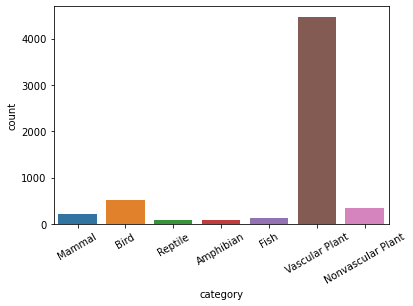

In [30]:
sns.countplot(x='category',data=species)
plt.xticks(rotation=30)
plt.show()

It appears that vascular plants are the most common category in the species dataset. Something we can now do is combine the previous two graphs to show what categories of animals/plants are in what type of conservation_status.

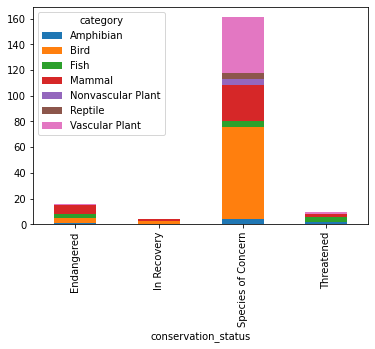

In [40]:
pd.crosstab(species['conservation_status'],species['category']).plot(kind='bar',stacked=True)
plt.show()

It appears that Birds make up the largest portion of the Species of Concern category followed by Vascular Plants and Mammals. We  have investigated the species dataset. Now, we can investigate the observations dataset. We can first ask which park has the most number of species in it.

In [45]:
observations.park_name.value_counts()

Great Smoky Mountains National Park    5824
Yellowstone National Park              5824
Bryce National Park                    5824
Yosemite National Park                 5824
Name: park_name, dtype: int64

It appears that each national park in the data set has equal number of unique species. There are different number of observations for each species so we can find out which national park has the most animals/plants and which has the highest average of animals.

In [57]:
observations.groupby('park_name')['observations'].agg([sum,np.mean]).round(0)

,sum,mean
park_name,,
Bryce National Park,576025,99.0
Great Smoky Mountains National Park,431820,74.0
Yellowstone National Park,1443562,248.0
Yosemite National Park,863332,148.0


From the table, Great Smoky Mountains National Park has the least number of plants/animals and the lowest number of plants/animals while Yellowstone National Park has the largest number of plants/animals and the highest mean number of animals. We can visualize total number of animals.

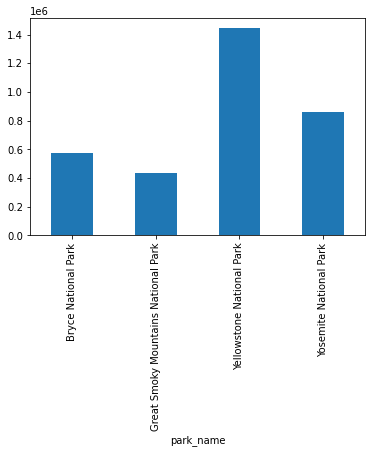

In [56]:
observations.groupby('park_name')['observations'].agg(sum).plot(kind='bar')
plt.show()

We've learned much from exploring the data. The last question we will ask is: "Which species were spotted the most at each park?" To answer this question, we'll have to merge the two datasets together.

In [61]:
merged_data = species.merge(observations,on='scientific_name')
merged_data.head(10)

,category,scientific_name,common_names,conservation_status,park_name,observations
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN,Bryce National Park,130
1,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN,Yellowstone National Park,270
2,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN,Great Smoky Mountains National Park,98
3,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN,Yosemite National Park,117
4,Mammal,Bos bison,"American Bison, Bison",NaN,Yosemite National Park,128
5,Mammal,Bos bison,"American Bison, Bison",NaN,Yellowstone National Park,269
6,Mammal,Bos bison,"American Bison, Bison",NaN,Bryce National Park,68
7,Mammal,Bos bison,"American Bison, Bison",NaN,Great Smoky Mountains National Park,77
8,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN,Bryce National Park,99
9,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN,Yosemite National Park,124


In [69]:
len(merged_data)

25632

The length of the merged dataframe is 25632. We can continue with answering the main question.

In [77]:
merged_data.groupby(['park_name','category']).sum().sort_values(by='observations',ascending=False)

observations
park_name                           category                       
Yellowstone National Park           Vascular Plant          1218162
Yosemite National Park              Vascular Plant           727895
Bryce National Park                 Vascular Plant           484373
Great Smoky Mountains National Park Vascular Plant           364882
Yellowstone National Park           Bird                     144300
Yosemite National Park              Bird                      86612
Yellowstone National Park           Nonvascular Plant         83021
                                    Mammal                    70701
Bryce National Park                 Bird                      58590
Yosemite National Park              Nonvascular Plant         49783
Great Smoky Mountains National Park Bird                      42869
Yosemite National Park              Mammal                    42533
Bryce National Park                 Nonvascular Plant         32992
Yellowstone National Park           Fish                      31459
Bryce National Park                 Mammal                    28830
Great Smoky Mountains National Park Nonvascular Plant         24857
                                    Mammal                    21056
Yellowstone National Park           Reptile                   20061
                                    Amphibian                 19937
Yosemite National Park              Fish                      19137
Bryce National Park                 Fish                      12823
Yosemite National Park              Reptile                   11779
                                    Amphibian                 11713
Great Smoky Mountains National Park Fish                       9482
Bryce National Park                 Reptile                    8141
                                    Amphibian                  7542
Great Smoky Mountains National Park Amphibian                  5876
                                    Reptile                    5841

It appears that for all 4 national parks, vascular plant is the most common species. This makes sense considering the graph we made before that shows how common vascular plants are. We can visualize this table as a stacked bar graph.

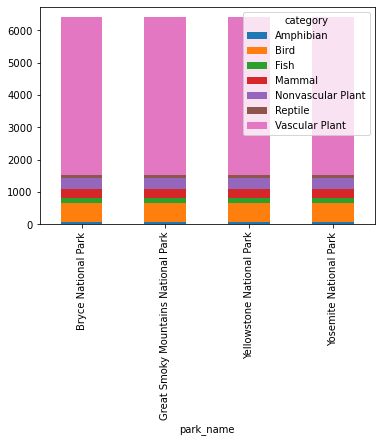

In [79]:
pd.crosstab(merged_data['park_name'],merged_data['category']).plot(kind='bar',stacked=True)
plt.show()

# Conclusion

In conclusion, we've learned much from the datasets about the different species in 4 different national parks. We learned that out of 4 conservation statuses, Species of Concern is the most common. We also learned that vascular plants are the most common species for each of the 4 national parks. We also learned that birds make up the majority of the Species of Concern category meaning that we should keep a close look at them in the future to prevent them from entering the more dangerous categories such as endangered.